In [3]:
from google_play_scraper import reviews, Sort
import pandas as pd

In [4]:
# Mengambil ulasan dari aplikasi "Identitas Kependudukan Digital"
result, continuation_token = reviews(
    'gov.dukcapil.mobile_id',  
    lang='id',  
    country='id', 
    sort=Sort.MOST_RELEVANT, 
    count=5000  
)

In [6]:
# Mengkonversi hasil ke dalam DataFrame Pandas
datIKD = pd.DataFrame(result)
datIKD.to_csv('IKDreviews.csv', index=False)

In [7]:
ikdReviews  = pd.read_csv('IKDreviews.csv')

In [8]:
ikdReviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,41c8ddae-e47d-4fb5-9193-fde7d81615d2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong d perbaiki & disempurnakan lagi Masa ra...,1,17,1.2.2,2024-08-12 13:49:17,NaN,NaN,1.2.2
1,a01300ea-7148-4624-9404-63a1e7fa7a60,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"masih banyak fitur yang belum terintegrasi, ke...",3,16,NaN,2024-07-24 10:32:38,NaN,NaN,NaN
2,96672be2-ba1c-452f-ac81-a21cab448be7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tujuan dari aplikasi ini mungkin sudah baik......,3,256,1.2.2,2024-06-07 11:10:33,NaN,NaN,1.2.2
3,73fdbe57-87b6-47a2-95b4-f83249788e9d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Upayanya bagus membuat apk ini tapi benar2 use...,1,385,1.2.2,2024-06-05 13:27:32,NaN,NaN,1.2.2
4,cdb8c4cd-cf80-4e60-90cd-53af31d66410,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Untuk pencetakan dokumen mungkin bisa lebih di...,3,13,1.2.2,2024-06-26 14:50:17,NaN,NaN,1.2.2


In [9]:
dataIKD = ikdReviews[['content', 'score']]

In [10]:
dataIKD.head()

,content,score
0,Tolong d perbaiki & disempurnakan lagi Masa ra...,1
1,"masih banyak fitur yang belum terintegrasi, ke...",3
2,tujuan dari aplikasi ini mungkin sudah baik......,3
3,Upayanya bagus membuat apk ini tapi benar2 use...,1
4,Untuk pencetakan dokumen mungkin bisa lebih di...,3


In [11]:
dataIKD.shape

(5000, 2)

In [12]:
dataIKD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5000 non-null   object
 1   score    5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [13]:
dataIKD.isnull().sum()

content    0
score      0
dtype: int64

In [14]:
dataIKD = dataIKD.dropna()

In [15]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Akmal
[nltk_data]     Fauzan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Akmal
[nltk_data]     Fauzan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Akmal
[nltk_data]     Fauzan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Lowercase the text
    text = text.lower()
    
    # Tokenization
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('indonesian')) 
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

In [18]:
#melakukan perubahan dan menambahkan kolom baru pada kolom yang berhasil di bersihkan
dataIKD['contents'] = dataIKD['content'].apply(preprocess_text)

In [19]:
dataIKD.sample(11)

,content,score,contents
1021,Tolong di perbaiki aplikasinya setiap masuk ak...,3,tolong perbaiki aplikasinya masuk akun pin sal...
4964,Sayangnya belum bisa dibuat pendaptaran akun p...,3,sayangnya pendaptaran akun perbankan berbasis ...
446,"Keluhan ini dibaca ya. Jangan diam aja, segera...",1,keluhan dibaca ya diam aja perbaiki merepotkan...
2540,Mantap bagus tambahkan ajuan lainnya dan perpa...,5,mantap bagus tambahkan ajuan perpanjang pengaj...
1565,"Mohon izin Kakak Admin menyampaikan masukan, s...",1,mohon izin kakak admin masukan menginstal ikd ...
56,Aplikasi sampah. Mau urus perubahan data ktp k...,1,aplikasi sampah urus perubahan data ktp kantor...
2033,"Aplikasi gak guna, baru login aja suru masukin...",1,aplikasi gak login aja suru masukin pasword pa...
4530,Harusnya barcode di kirim lewat email nga perl...,1,barcode kirim email nga disdukcapiljadi memper...
3105,"Bikin aplikasinya aja Abal"" suka eror mulu dan...",1,bikin aplikasinya aja abal suka eror mulu ktp ...
2446,Aplikasi yang bagus dalam mengikuti zaman yang...,5,aplikasi bagus mengikuti zaman serba digital s...


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_20384\3438349000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='score', data=dataIKD, palette='mako')


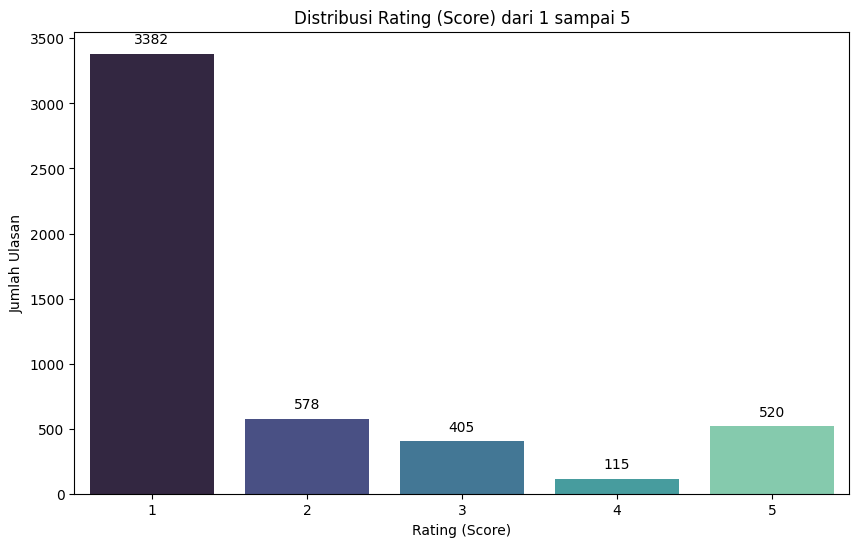

In [21]:
# Visualisasi distribusi rating
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='score', data=dataIKD, palette='mako')

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Distribusi Rating (Score) dari 1 sampai 5')
plt.xlabel('Rating (Score)')
plt.ylabel('Jumlah Ulasan')
plt.show()

In [ ]:
rating3 = dataIKD[dataIKD['score'] == 3]

In [ ]:
rating3.head(11)

In [ ]:
# Fungsi untuk memberi label berdasarkan rating / score
def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

# Tambahkan kolom label
dataIKD['label'] = dataIKD['score'].apply(label_sentiment)

In [ ]:
dataIKD.sample(11)

In [16]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(dataIKD['contents'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()) 

# Display the TF-IDF DataFrame
print(tfidf_df.head())

    10   30  a2f  abis  account   ad  adil  admin   ah   aj  ...  yah  yahudi  \
0  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0  0.0  0.0  ...  0.0     0.0   
1  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0  0.0  0.0  ...  0.0     0.0   
2  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0  0.0  0.0  ...  0.0     0.0   
3  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0  0.0  0.0  ...  0.0     0.0   
4  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0  0.0  0.0  ...  0.0     0.0   

   yes   yg  yng  you  your  youtube  zionis  zuckerberg  
0  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  
1  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  
2  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  
3  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  
4  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  

[5 rows x 1000 columns]


C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_25448\1452771361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=facebook, palette='mako')


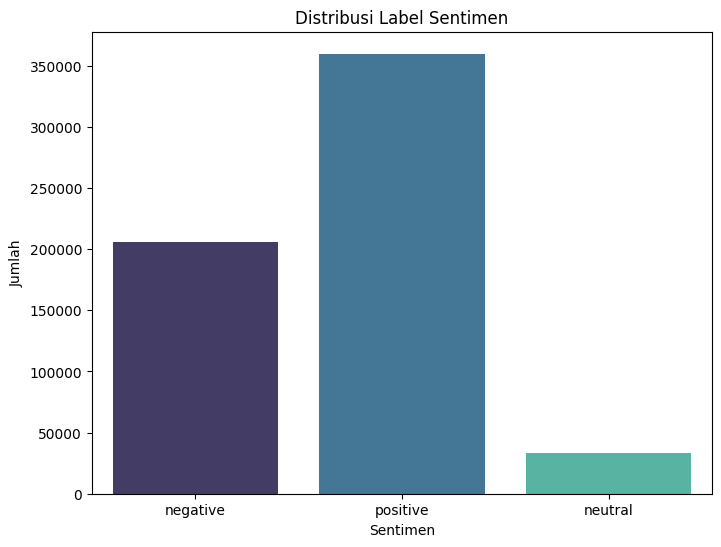

In [21]:
# Visualisasi distribusi label
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=facebook, palette='mako')
plt.title('Distribusi Label Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [35]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, facebook['label'], test_size=0.2, random_state=42)

In [31]:
# # Terapkan SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [36]:
# Train Naive Bayes classifier
nbModel = MultinomialNB()
nbModel.fit(X_train, y_train)

MultinomialNB()

In [37]:
# Predict sentiment
y_pred = nbModel.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.781401682553739
              precision    recall  f1-score   support

    negative       0.74      0.71      0.72     41121
     neutral       0.34      0.00      0.00      6659
    positive       0.80      0.90      0.85     71919

    accuracy                           0.78    119699
   macro avg       0.63      0.54      0.52    119699
weighted avg       0.76      0.78      0.76    119699



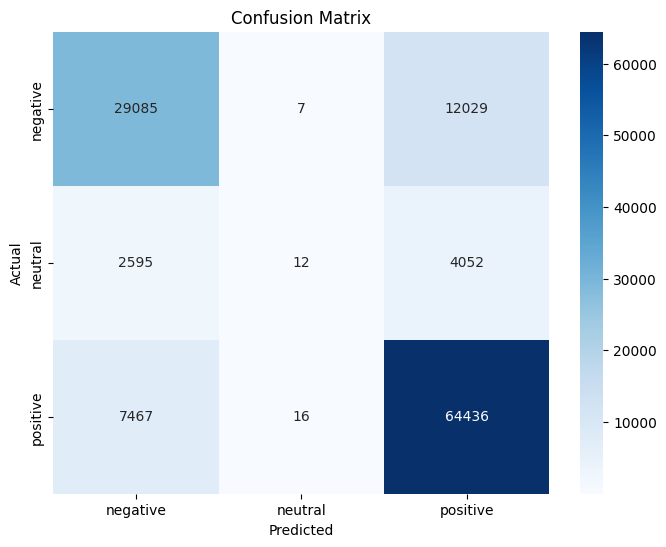

In [39]:
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()